# Objective of this Project


With the growing adoption of Blockchain technologies, ensuring the integrity and security of decentralized systems like Bitcoin has become critical. This project will focus on providing an efficient method to identify malicious activity within the Blockchain, improving the security and reliability of decentralized networks.
This project proposes developing an anomaly detection system to detect a 51% attack in realtime by analyzing Blockchain transaction data using machine learning techniques. The proposed solution will involve injecting artificial anomalies into a Bitcoin dataset and then building machine learning models such as SVM, Random Forest, AdaBoost, and XGBoost to detect those anomalies.

#Download the Dataset

In [1]:
import gdown
import pandas as pd

# Google Drive File ID (Replace with your actual file ID)
file_id = "1ZAHTvSjGt7Y2nCtjDkVHADLxZrCpOndk"  # <-- Replace this!

# Construct the direct download URL
file_url = f"https://drive.google.com/uc?id={file_id}"
csv_file_path = "/content/bitcoin_full_data_2014_2024.csv"

# Download the file from Google Drive
gdown.download(file_url, csv_file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZAHTvSjGt7Y2nCtjDkVHADLxZrCpOndk
To: /content/bitcoin_full_data_2014_2024.csv
100%|██████████| 582k/582k [00:00<00:00, 14.2MB/s]


'/content/bitcoin_full_data_2014_2024.csv'

#Load the data

In [2]:
data = pd.read_csv(csv_file_path)

#EDA ( Exploratary Data Analysis) / Data Visullization


In [3]:
data.head()

,timestamp,Weight Mean,Difficulty Mean,Reward Mean,Transaction Sum,Witness Sum,Input Sum,Output Sum,Fee Total Sum,Total Blocks,close,volume,marketCap,open
0,2014-06-28,7.133559e+05,1.346258e+10,15001.231805,54392,0,159913,170152,5547.6133,182,596.549011,20814600.0,7.737367e+09,599.077026
1,2014-06-29,7.874227e+05,1.542908e+10,15029.053786,49094,0,141290,214015,5228.6300,157,602.715027,13398100.0,7.730992e+09,596.331970
2,2014-06-30,1.303002e+06,1.681846e+10,15038.486098,70231,0,214517,214243,7126.1470,132,639.796997,8897470.0,7.813281e+09,602.619995
3,2014-07-01,1.317608e+06,1.681846e+10,15591.008950,69443,0,220478,214590,8147.4299,133,640.806030,46422400.0,8.296104e+09,641.390991
4,2014-07-02,1.166724e+06,1.681846e+10,16325.039533,66728,0,198070,205101,8293.8570,137,650.879028,38446300.0,8.311318e+09,641.036987


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3488 entries, 0 to 3487
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        3488 non-null   object 
 1   Weight Mean      3488 non-null   float64
 2   Difficulty Mean  3488 non-null   float64
 3   Reward Mean      3488 non-null   float64
 4   Transaction Sum  3488 non-null   int64  
 5   Witness Sum      3488 non-null   int64  
 6   Input Sum        3488 non-null   int64  
 7   Output Sum       3488 non-null   int64  
 8   Fee Total Sum    3488 non-null   float64
 9   Total Blocks     3488 non-null   int64  
 10  close            3488 non-null   float64
 11  volume           3488 non-null   float64
 12  marketCap        3488 non-null   float64
 13  open             3488 non-null   float64
dtypes: float64(8), int64(5), object(1)
memory usage: 381.6+ KB


As you can see there is no null values and only one column of** timestamp** have object data type.
That means except for that one column all the other data is completely numerical (Float or int)

In [49]:
data.shape

(3488, 27)

In [5]:
data.describe()

,Weight Mean,Difficulty Mean,Reward Mean,Transaction Sum,Witness Sum,Input Sum,Output Sum,Fee Total Sum,Total Blocks,close,volume,marketCap,open
count,3.488000e+03,3.488000e+03,3488.000000,3488.000000,3488.000000,3.488000e+03,3.488000e+03,3.488000e+03,3488.000000,3488.000000,3.488000e+03,3.488000e+03,3488.000000
mean,3.177644e+06,1.705459e+13,120813.738063,268859.671732,135104.288131,6.841720e+05,7.546798e+05,1.089822e+06,148.371560,16136.994886,1.609513e+10,3.041493e+11,16122.715879
std,8.523185e+05,2.191668e+13,115026.927157,114458.739897,148592.073157,2.359717e+05,3.051328e+05,2.717433e+06,15.684538,18735.283133,1.903621e+10,3.613447e+11,18718.601384
min,7.133559e+05,1.346258e+10,4998.237240,49094.000000,0.000000,1.347070e+05,1.601960e+05,2.538592e+03,58.000000,178.102997,5.760120e+06,2.444379e+09,176.897003
25%,2.726170e+06,2.585227e+11,13691.455436,208602.500000,0.000000,5.423292e+05,5.668998e+05,5.742986e+04,138.000000,738.742493,1.177812e+08,1.177872e+10,736.317734
50%,3.398471e+06,7.152633e+12,92900.172946,266049.500000,118308.500000,6.935415e+05,7.485320e+05,3.041555e+05,148.000000,8074.731544,1.067175e+10,1.410210e+11,8075.124243
75%,3.941512e+06,2.504649e+13,184473.469127,319083.750000,202481.250000,8.510798e+05,8.986328e+05,8.109215e+05,158.000000,27197.299371,2.612485e+10,5.276944e+11,27181.193057
max,3.995786e+06,8.810419e+13,819092.831490,927010.000000,917239.000000,1.751024e+06,2.521252e+06,8.033406e+07,216.000000,73083.501328,3.509679e+11,1.436272e+12,73079.373379


##Histogram for all columns

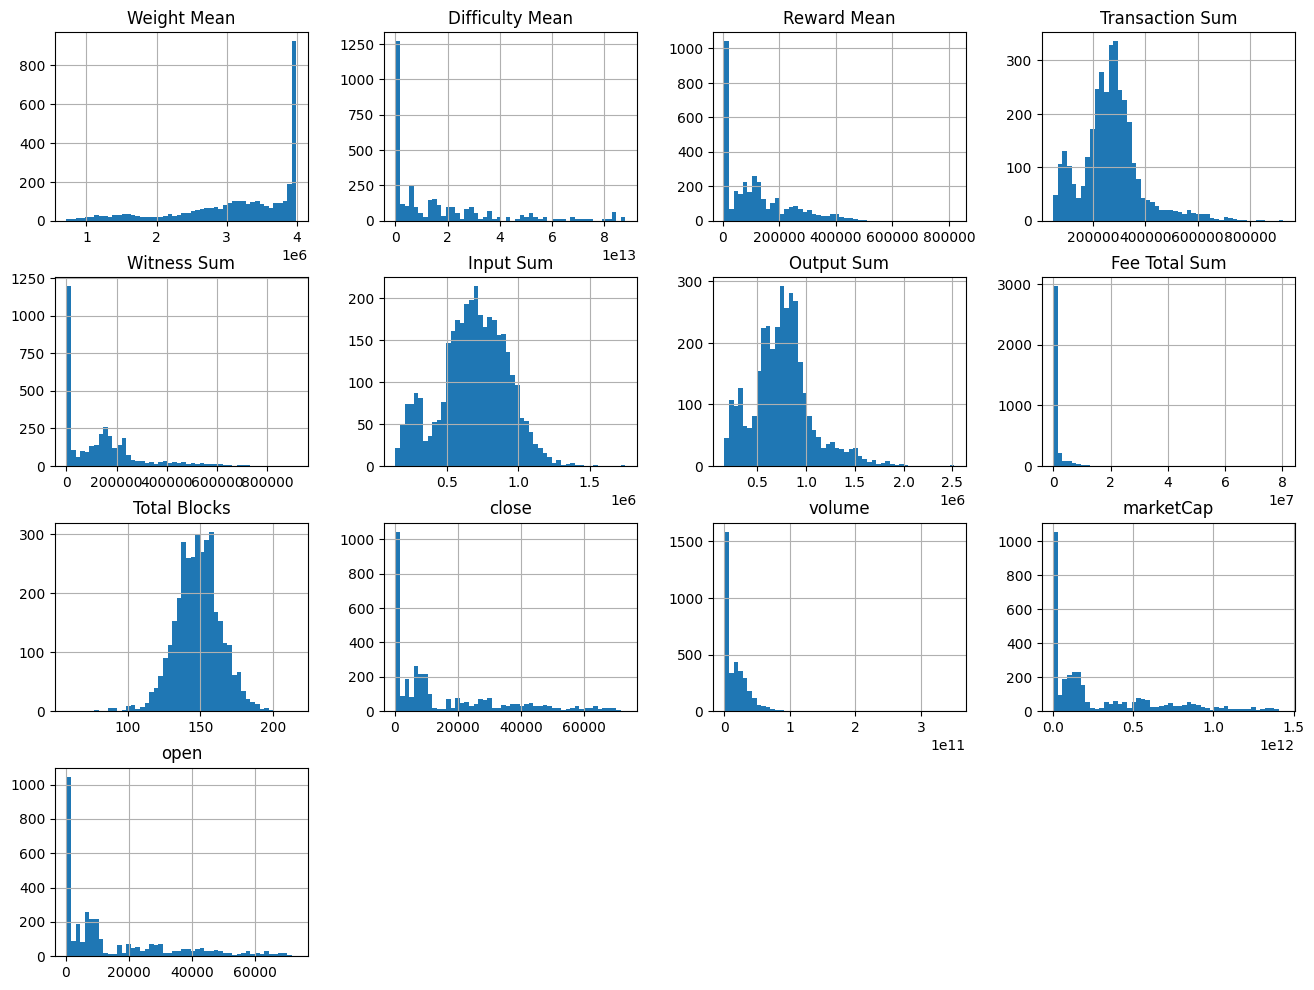

In [6]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(16,12));

###Key Properties from above Histogram

1. Transaction_Sum,Input Sum and Output SUm is skewed right which means most of the rows of the data have values in a small range. Consequently you can also look at thier relevant percentiles
2. Total No of Blocks are almost skwed symmetric which means the number of blocks mined during a specific period have a very consistent range and not have too much variation in the data.

##Finding Correlations in data

In [54]:
data.corr()

,timestamp,Weight Mean,Difficulty Mean,Reward Mean,Transaction Sum,Witness Sum,Input Sum,Output Sum,Fee Total Sum,Total Blocks,...,transaction_change_smooth,difficulty_rolling_avg,difficulty_change_smooth,Confirmations,Anomaly,day_of_week,month,day_of_month,elapsed_days,Block Height
timestamp,1.000000,0.561498,0.819012,0.713911,0.174341,0.811408,0.773503,0.739152,0.262896,-0.125578,...,0.048090,0.801375,-0.138144,-0.005963,0.039001,-0.005522,-0.064023,0.004467,1.000000,-0.012042
Weight Mean,0.561498,1.000000,0.447964,0.461465,0.210897,0.476807,0.826983,0.742783,0.324258,-0.209669,...,0.152433,0.453252,-0.047312,0.013006,-0.019876,-0.115044,-0.128278,-0.009431,0.561498,0.022323
Difficulty Mean,0.819012,0.447964,1.000000,0.680778,0.122534,0.905782,0.696014,0.768298,0.342681,-0.112113,...,0.085362,0.984379,-0.093757,0.056921,-0.090708,0.004570,-0.068835,0.002778,0.819012,-0.015908
Reward Mean,0.713911,0.461465,0.680778,1.000000,0.152612,0.673931,0.666852,0.659689,0.558921,-0.075764,...,0.043726,0.690556,-0.056574,0.002451,0.006331,-0.006702,-0.073133,-0.001437,0.713911,-0.025033
Transaction Sum,0.174341,0.210897,0.122534,0.152612,1.000000,0.227155,0.222755,0.260390,0.134718,-0.007090,...,0.050162,0.204113,-0.042133,-0.243731,0.576023,-0.026775,-0.005026,-0.007017,0.174341,-0.007642
Witness Sum,0.811408,0.476807,0.905782,0.673931,0.227155,1.000000,0.731419,0.858733,0.360531,-0.063884,...,0.187636,0.918653,-0.116975,0.005071,0.016034,-0.006999,-0.014305,0.005552,0.811408,-0.011493
Input Sum,0.773503,0.826983,0.696014,0.666852,0.222755,0.731419,1.000000,0.843378,0.328822,0.091809,...,0.176218,0.705178,-0.105367,0.010941,-0.007470,-0.087104,-0.092054,-0.029803,0.773503,-0.007596
Output Sum,0.739152,0.742783,0.768298,0.659689,0.260390,0.858733,0.843378,1.000000,0.474815,0.009231,...,0.265299,0.778956,-0.083446,0.016126,-0.011310,-0.048550,-0.062405,-0.017624,0.739152,-0.005408
Fee Total Sum,0.262896,0.324258,0.342681,0.558921,0.134718,0.360531,0.328822,0.474815,1.000000,-0.019440,...,0.077864,0.350733,0.006901,0.007974,-0.008959,-0.003620,-0.038149,0.000947,0.262896,-0.006936
Total Blocks,-0.125578,-0.209669,-0.112113,-0.075764,-0.007090,-0.063884,0.091809,0.009231,-0.019440,1.000000,...,0.120918,-0.111589,0.002700,-0.017995,0.001673,0.038590,-0.011576,-0.072222,-0.125578,-0.034664


###How to check for close relationship

If a property has value close to 1 that means a strong linear relationship exists there
If a property/Column has value close to -1 that means a strong negative linear relationship is there.
If a property/Column has value close to 0 in alignment of that means no linear relation exists there between those features

# Preprocess the Dataset:

##1. Check for missing values.

In [7]:
data.isna().any().any()

False

In [8]:
# Check for missing values
print(data.isnull().sum())

timestamp          0
Weight Mean        0
Difficulty Mean    0
Reward Mean        0
Transaction Sum    0
Witness Sum        0
Input Sum          0
Output Sum         0
Fee Total Sum      0
Total Blocks       0
close              0
volume             0
marketCap          0
open               0
dtype: int64


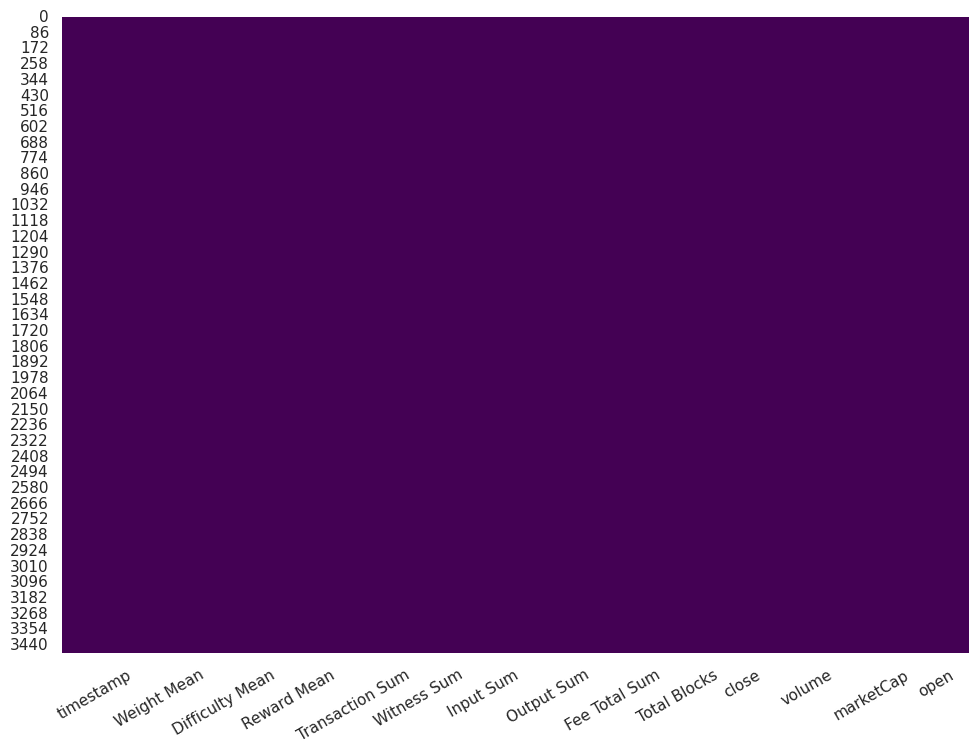

In [9]:
# Visualize missing data
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
shape = sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.xticks(rotation=30)
plt.show();

As, there is no null or missing values there is no need to handle those, This can also be verfied from above where you can see that all the values are non null and all rows are included in every column.

##2. Finding Inconsistencies

###a. Identify Duplicates
  Duplicate rows often indicate redundancy or errors.

In [10]:
# Check for duplicate rows
duplicates = data.duplicated()
print(duplicates.sum())  # Number of duplicate rows

# View duplicate rows
print(data[data.duplicated()])

0
Empty DataFrame
Columns: [timestamp, Weight Mean, Difficulty Mean, Reward Mean, Transaction Sum, Witness Sum, Input Sum, Output Sum, Fee Total Sum, Total Blocks, close, volume, marketCap, open]
Index: []


###b. Validate Data Types
Ensure columns have the expected data types (e.g., numeric columns should not contain strings).

In [11]:
# Check data types
print(data.dtypes)

timestamp           object
Weight Mean        float64
Difficulty Mean    float64
Reward Mean        float64
Transaction Sum      int64
Witness Sum          int64
Input Sum            int64
Output Sum           int64
Fee Total Sum      float64
Total Blocks         int64
close              float64
volume             float64
marketCap          float64
open               float64
dtype: object


let's analyze this one data type of object closely other are seeming completely numerical

In [12]:
data["timestamp"].value_counts().sort_values(ascending=False)

,count
timestamp,
2022-05-16,2
2014-07-10,1
2014-07-23,1
2014-06-30,1
2014-07-01,1
...,...
2024-06-10,1
2024-06-11,1
2024-06-12,1


Except one value, all are unique, that means it is not a categorical attribute. Rather It looks a simple date column with data type object.

Since anomaly detection in blockchain heavily relies on time patterns (e.g., sudden mining speed changes), we should convert timestamps to datetime format.

In [14]:
# Convert timestamp column to datetime while handling errors
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Check if any conversion failed
invalid_timestamps = data[data['timestamp'].isna()]
if not invalid_timestamps.empty:
    print("Warning: Some timestamps could not be converted. Here are the problematic rows:")
    print(invalid_timestamps)

# Display final dtypes to verify conversion
print(data.dtypes)

timestamp          datetime64[ns]
Weight Mean               float64
Difficulty Mean           float64
Reward Mean               float64
Transaction Sum             int64
Witness Sum                 int64
Input Sum                   int64
Output Sum                  int64
Fee Total Sum             float64
Total Blocks                int64
close                     float64
volume                    float64
marketCap                 float64
open                      float64
dtype: object


###c. Detect Outliers
Use statistical methods to find values that deviate significantly from the mean.

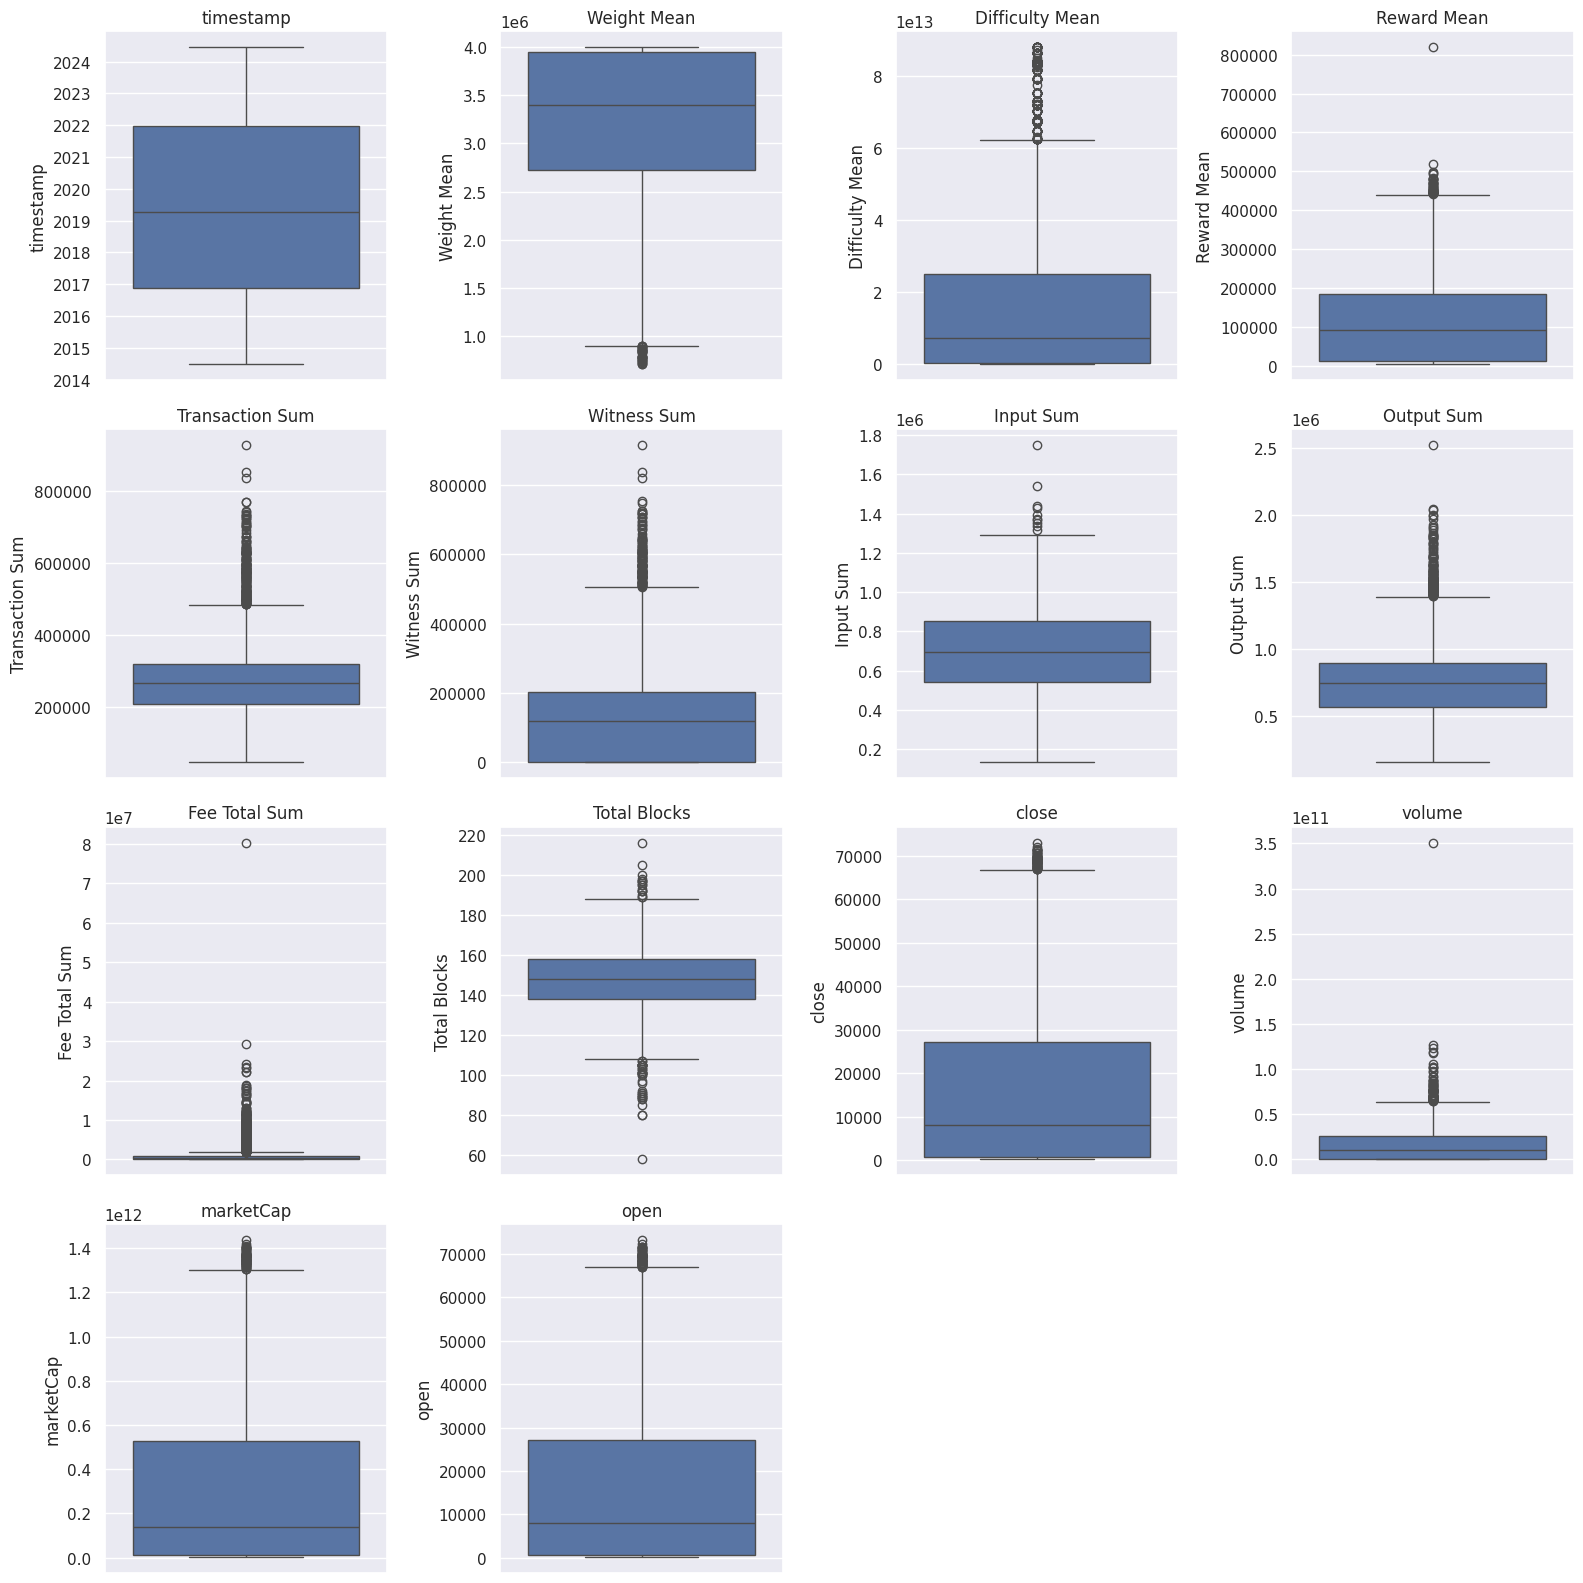

In [15]:
# Split box plots into subplots for better visualization
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_cols = len(data.columns)
cols_per_row = 4  # Number of box plots per row
rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.boxplot(y=data[column], ax=axes[i])
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

WIth BoxPlot, Everything is looking like an outliler (due to the fact that most dots are outside whister). That means it isn't a good measure for our case let's do something different to detect outliers

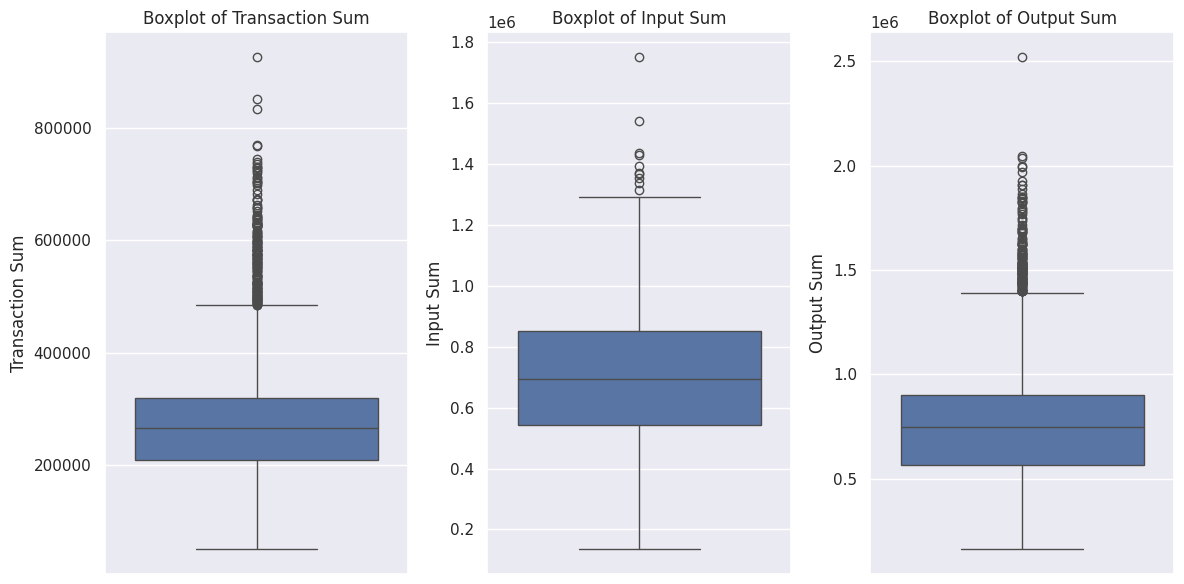

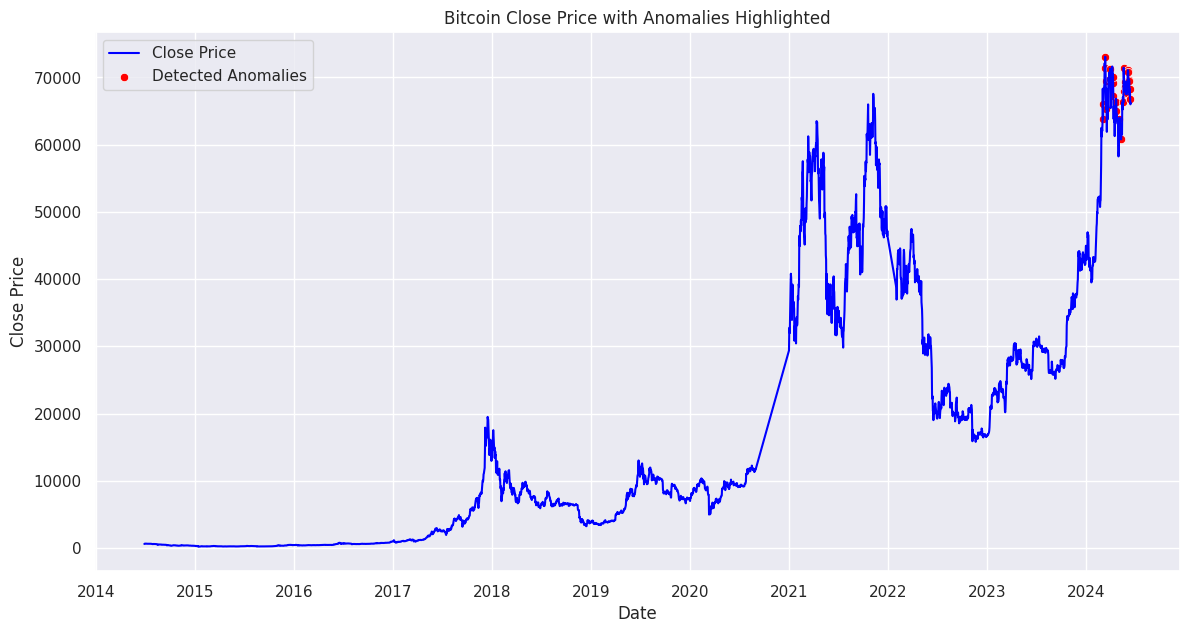

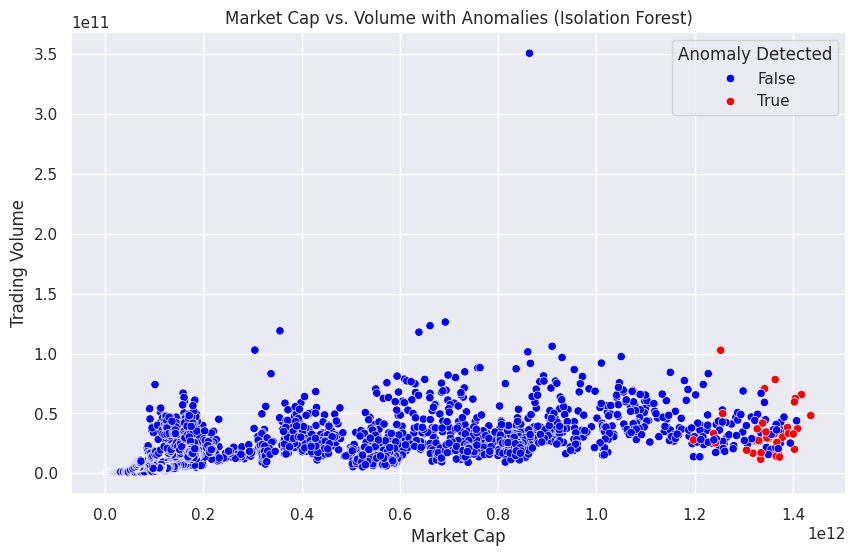

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Set plot style
sns.set(style="darkgrid")


# Define right-skewed columns for IQR analysis
right_skewed_cols = ["Transaction Sum", "Input Sum", "Output Sum"]

# Ensure complex columns for Isolation Forest
complex_cols = ["volume", "close", "marketCap", "Weight Mean", "Difficulty Mean", "Reward Mean", "Witness Sum", "open"]

# ✅ Step 1: Run Isolation Forest again before plotting
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Lower contamination for better accuracy
data["outlier_isolation_forest"] = iso_forest.fit_predict(data[complex_cols])

# Convert Isolation Forest results (-1 means outlier)
data["outlier_isolation_forest"] = data["outlier_isolation_forest"].apply(lambda x: True if x == -1 else False)

# ✅ Step 2: Boxplot for Right-Skewed Data (IQR Outliers)
plt.figure(figsize=(12, 6))
for i, col in enumerate(right_skewed_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# ✅ Step 3: Time Series Plot for Volume, Close Price, and Market Cap with Anomalies Highlighted
plt.figure(figsize=(14, 7))
sns.lineplot(x=data["timestamp"], y=data["close"], label="Close Price", color="blue")
sns.scatterplot(x=data[data["outlier_isolation_forest"]]["timestamp"],
                y=data[data["outlier_isolation_forest"]]["close"],
                color="red", label="Detected Anomalies")
plt.title("Bitcoin Close Price with Anomalies Highlighted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# ✅ Step 4: Scatter Plot to Show Isolation Forest Anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["marketCap"], y=data["volume"], hue=data["outlier_isolation_forest"], palette={True: "red", False: "blue"})
plt.title("Market Cap vs. Volume with Anomalies (Isolation Forest)")
plt.xlabel("Market Cap")
plt.ylabel("Trading Volume")
plt.legend(title="Anomaly Detected")
plt.show()


As you can see except the box plots, the other two charts shows even the detected red anomalies as normal data (No Outliers).

And As far as Box Plots are concerned, they are still showing everything as outlier which could mean data is extremely skewed towards right. That could be due to the fluctuations in the feild of block chain. We do not have to worry much about that.

In [17]:
data = data.drop(columns=["outlier_isolation_forest"])

# Transform the Data/ Feature Engineering

In [18]:
# Create time-based features (Daily % Change)
data["transaction_change"] = data["Transaction Sum"].pct_change().fillna(0)
data["difficulty_change"] = data["Difficulty Mean"].pct_change().fillna(0)

In [19]:

# Create rolling averages (10-day window for trend detection)
data["transaction_rolling_avg"] = data["Transaction Sum"].rolling(window=10, min_periods=1).mean()
data["transaction_change_smooth"] = data["transaction_change"].rolling(window=5, min_periods=1).mean()
data["difficulty_rolling_avg"] = data["Difficulty Mean"].rolling(window=10, min_periods=1).mean()
data["difficulty_change_smooth"] = data["difficulty_change"].rolling(window=5, min_periods=1).mean()

# Display updated dataframe
data.head()

,timestamp,Weight Mean,Difficulty Mean,Reward Mean,Transaction Sum,Witness Sum,Input Sum,Output Sum,Fee Total Sum,Total Blocks,close,volume,marketCap,open,transaction_change,difficulty_change,transaction_rolling_avg,transaction_change_smooth,difficulty_rolling_avg,difficulty_change_smooth
0,2014-06-28,7.133559e+05,1.346258e+10,15001.231805,54392,0,159913,170152,5547.6133,182,596.549011,20814600.0,7.737367e+09,599.077026,0.000000,0.000000e+00,54392.000000,0.000000,1.346258e+10,0.000000
1,2014-06-29,7.874227e+05,1.542908e+10,15029.053786,49094,0,141290,214015,5228.6300,157,602.715027,13398100.0,7.730992e+09,596.331970,-0.097404,1.460718e-01,51743.000000,-0.048702,1.444583e+10,0.073036
2,2014-06-30,1.303002e+06,1.681846e+10,15038.486098,70231,0,214517,214243,7126.1470,132,639.796997,8897470.0,7.813281e+09,602.619995,0.430541,9.004926e-02,57905.666667,0.111046,1.523671e+10,0.078707
3,2014-07-01,1.317608e+06,1.681846e+10,15591.008950,69443,0,220478,214590,8147.4299,133,640.806030,46422400.0,8.296104e+09,641.390991,-0.011220,-1.110223e-16,60790.000000,0.080479,1.563215e+10,0.059030
4,2014-07-02,1.166724e+06,1.681846e+10,16325.039533,66728,0,198070,205101,8293.8570,137,650.879028,38446300.0,8.311318e+09,641.036987,-0.039097,2.220446e-16,61977.600000,0.056564,1.586941e+10,0.047224


**🤔 Why Use pct_change() for Blockchain Anomalies?**

  In a 51% attack, an attacker may generate an unusually high or low number of transactions in blocks they control.

  If a block suddenly has +500% transactions compared to the last block, it could be an attack indicator.

  pct_change() helps detect rapid fluctuations in Transaction Sum and Difficulty Mean, which are strong signs of anomalous mining behavior.

  If you see many large spikes or drops in transaction_change, that could mean something suspicious is happening.

**🤔 Why Use a Rolling Average for Blockchain Anomalies?**

Smooths Out Spikes: If one block has an unusually high transaction count, the rolling average helps reduce noise and highlight true trends over time.

Detects Gradual Manipulations: If an attacker slowly increases control over the blockchain, a rolling average can show a growing pattern of anomalies.

Filters Out Random Fluctuations: Normal fluctuations in transactions won’t trigger false alarms.

# Injecting Artificial Anomalies

##Select Anomalies Indices

In [20]:
#Step 1: Decide the Number of Anomalies
anomaly_percentage = 0.07
num_anomalies = int(len(data) * anomaly_percentage)
#Step 2: Select Random Rows for Anomalies
anomaly_indices = np.random.choice(data.index, num_anomalies, replace=False)


## Injecting Anomalies into Different Features

In [21]:
#Step 3: Injecting Anomalies into Different Features
data.loc[anomaly_indices, "Transaction Sum"] *= np.random.choice([0.1, 10], size=num_anomalies)
#✅ Multiplies Transaction Sum by 0.1 (extremely low) or 10 (extremely high).
#✅ This mimics an attack where transaction volume is manipulated.

<ipython-input-21-fba130c9a555>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.17029e+06 2.42730e+04 1.94580e+06 3.45975e+04 5.81449e+04 8.26790e+03
 1.44304e+06 2.28039e+06 3.27789e+04 3.44560e+04 6.85180e+05 2.92459e+06
 1.12958e+04 2.88495e+06 2.25369e+06 2.37463e+06 2.39771e+06 7.26600e+03
 2.16063e+04 3.15386e+06 3.33619e+06 2.45021e+04 2.46421e+06 9.69590e+05
 2.82523e+06 5.73697e+04 2.50739e+06 2.69131e+06 8.94980e+03 3.38781e+04
 2.65555e+04 1.46349e+04 8.57050e+03 6.60260e+03 9.87140e+05 5.95530e+03
 3.61050e+04 3.64383e+06 1.96422e+04 2.79240e+06 2.18017e+06 2.37402e+06
 3.34593e+06 2.70453e+06 1.71761e+06 2.58590e+06 1.81065e+04 3.10851e+04
 7.57380e+03 2.93734e+04 3.26098e+06 2.17890e+04 2.44914e+04 2.87007e+04
 2.85653e+04 2.76624e+04 3.66415e+04 2.91921e+04 1.26945e+06 2.14191e+06
 3.05965e+06 3.85002e+04 1.50199e+04 4.23069e+06 2.60362e+06 3.18524e+04
 5.73466e+04 7.97030e+05 1.94580e

In [22]:
data.loc[anomaly_indices, "Confirmations"] = 0
#✅ Sets confirmations to 0 to simulate unverified or fake transactions.

#As this is a new column so handle all values (Nan other than anomaly_indices)

# 1. Create a boolean mask to select NON-anomaly rows:
non_anomaly_mask = ~data.index.isin(anomaly_indices)

# 2. Generate random confirmation values for non-anomaly rows:
num_non_anomalies = non_anomaly_mask.sum() #get the number of non anomaly rows.
random_confirmations = np.random.randint(1, 101, size=num_non_anomalies)  # Generate random integers between 1 and 100

# 3. Assign the random values to the "Confirmations" column for non-anomaly rows: ( as we are generating a new column of confirmations )
data.loc[non_anomaly_mask, "Confirmations"] = random_confirmations



In [23]:
data.loc[anomaly_indices, "Difficulty Mean"] *= 0.5
#✅ Reduces mining difficulty by 50% to simulate an easier attack scenario.

In [24]:
data.loc[anomaly_indices, "timestamp"] = data["timestamp"].sample(num_anomalies, replace=True).values
#✅ Overlaps timestamps by randomly assigning another timestamp in the dataset.
#✅ Simulates irregular mining behavior.

In [47]:
# Generate unique random block heights
data["Block Height"] = np.random.choice(range(1, len(data) * 10), size=len(data), replace=False)

# Ensure anomalies have duplicate block heights
data.loc[anomaly_indices, "Block Height"] = np.random.choice(data["Block Height"], size=num_anomalies, replace=True)

# Anomaly Labeling:

In [25]:
#Step4: Labelling Anomalies Supervised Learning Task
data["Anomaly"] = 0
data.loc[anomaly_indices, "Anomaly"] = 1
#✅ Adds a new column Anomaly, where:
#1 = Anomalous Block
#0 = Normal Block#

Validating the Anomally Injection Process

In [26]:
data["Anomaly"].value_counts()

,count
Anomaly,
0,3244
1,244


In [27]:
data.groupby("Anomaly")[["Transaction Sum", "Difficulty Mean", "Confirmations"]].describe()
#checking impact on key features

Transaction Sum                                                 \
                  count          mean           std      min       25%   
Anomaly                                                                  
0                3244.0  2.692883e+05  1.143630e+05  49094.0  208868.0   
1                 244.0  1.374761e+06  1.457314e+06   5949.4   27592.3   

                                         Difficulty Mean                ...  \
              50%         75%        max           count          mean  ...   
Anomaly                                                                 ...   
0        266180.5   319653.25   927010.0          3244.0  1.693356e+13  ...   
1        888505.0  2651520.00  6067130.0           244.0  9.331877e+12  ...   

                                    Confirmations                            \
                  75%           max         count       mean       std  min   
Anomaly                                                                       
0        2.446587e+13  8.810419e+13        3244.0  50.964242  28.47746  1.0   
1        1.429358e+13  4.405210e+13         244.0   0.000000   0.00000  0.0   

                                  
          25%   50%   75%    max  
Anomaly                           
0        27.0  51.0  75.0  100.0  
1         0.0   0.0   0.0    0.0  

[2 rows x 24 columns]

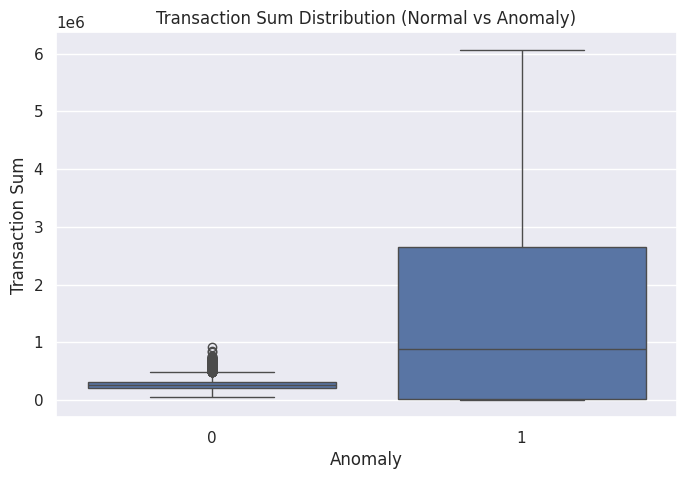

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="Anomaly", y="Transaction Sum", data=data)
plt.title("Transaction Sum Distribution (Normal vs Anomaly)")
plt.show()

✅ If anomalies were injected correctly, we should see extreme values for Anomaly = 1.

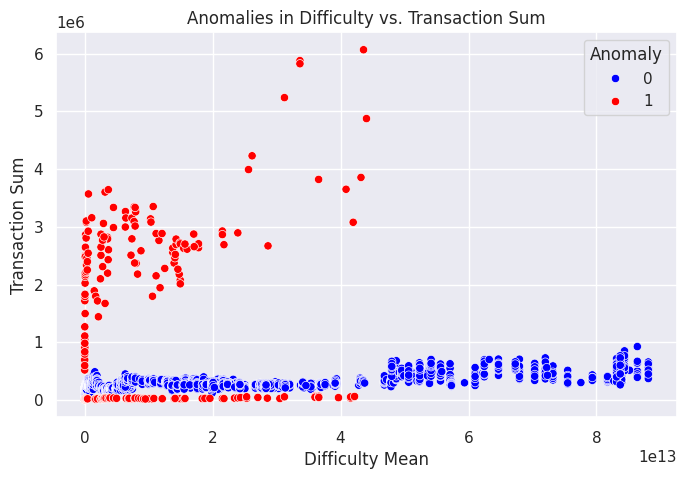

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Difficulty Mean"], y=data["Transaction Sum"], hue=data["Anomaly"], palette={0: "blue", 1: "red"})
plt.title("Anomalies in Difficulty vs. Transaction Sum")
plt.show()

If Anomalies were injected sucessfully we should see red points(Anomalies) away from the blue clusters.

#🚀 Extracting Time-Based Features from Timestamps (Part of Feature Engineering)
We will extract:

✅ Day of the week (0 = Monday, 6 = Sunday)

✅ Month (1-12)

✅ Day of the month (1-31)

✅ Elapsed days since the first block (for tracking time progression)



In [30]:
# Extract features
data["day_of_week"] = data["timestamp"].dt.dayofweek  # 0 = Monday, 6 = Sunday
data["month"] = data["timestamp"].dt.month  # 1-12
data["day_of_month"] = data["timestamp"].dt.day  # 1-31
data["elapsed_days"] = (data["timestamp"] - data["timestamp"].min()).dt.days  # Days since first block

# Drop original timestamp column (if not needed)
data_new = data.drop(columns=["timestamp"]).copy()
data_new.columns

Index(['Weight Mean', 'Difficulty Mean', 'Reward Mean', 'Transaction Sum',
       'Witness Sum', 'Input Sum', 'Output Sum', 'Fee Total Sum',
       'Total Blocks', 'close', 'volume', 'marketCap', 'open',
       'transaction_change', 'difficulty_change', 'transaction_rolling_avg',
       'transaction_change_smooth', 'difficulty_rolling_avg',
       'difficulty_change_smooth', 'Confirmations', 'Anomaly', 'day_of_week',
       'month', 'day_of_month', 'elapsed_days'],
      dtype='object')

#🚀 Feature Selection Explained for Anomaly Detection in Blockchain

In our dataset, we selected specific numerical features to train the SVM and Random Forest models. Let’s break down:

1️⃣ Which features were selected?

2️⃣ Why were these features included?

3️⃣ How do they help in detecting anomalies?

##📌 Selected Features & Their Importance

*Weight Mean:* Represents block size trends. Irregular weight changes may indicate an attack or manipulation.
<br><br>
*Difficulty Mean:* Measures how hard it is to mine a block. A sudden drop in difficulty can indicate an attack (e.g., a 51% attack).
<br><br>
*Reward Mean:* Miners receive rewards for mining blocks. Anomalies in rewards could indicate unusual mining behavior.
<br><br>
*Transaction Sum:*	The total number of transactions in a block. Spikes or sudden drops may indicate manipulation.
<br><br>
*Witness Sum:*	Represents the number of witnesses (in SegWit transactions).
<br><br>
*Anomalies:* Could show irregular transaction validation.

*Input Sum & Output Sum:*	Shows how much money is flowing in/out. Large, sudden movements may indicate fraud or market manipulation.
<br><br>
*Fee Total Sum:* Represents the total transaction fees per block. Unusual fee changes could indicate fee manipulation.
<br><br>
*Total Blocks:*	Number of blocks mined in a given time. If too many blocks appear suddenly, it may be an attack.
<br><br>
*Close, Volume, MarketCap, Open:*	Standard financial indicators. Market anomalies can affect blockchain behavior.
<br><br>
*Confirmations:*	Number of confirmations per block. Zero confirmations could indicate an invalid or fraudulent transaction.

##📌 Features Engineered from Timestamp

Since timestamp is not directly usable, we extracted new features to capture time-based patterns:
<br><br><br>

*Day of the Week (0-6)	:* Helps detect whether anomalies happen on specific days (e.g., weekends).
<br><br>
*Month (1-12):* Some attacks may be seasonal (e.g., around financial reporting periods).
<br><br>
*Day of the Month* (1-31): Helps identify irregular activities near salary cycles or financial closings.
<br><br>
Elapsed Days Since First Block: Helps detect out-of-sequence anomalies (e.g., if a block appears too early or late).

##📌 Why Did We Exclude Some Features?

*❌ Raw Timestamp –* Can't be used directly, so we extracted numerical time-based features instead.
<br><br>
*❌ Categorical Data –* We focused on numerical features because SVM & Random Forest work best with numerical input.



# Getting the Data Ready for Training for Machine Learning Models

##Spliting the data in Train and Test

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_new.drop(columns=["Anomaly"]),data_new["Anomaly"],test_size=0.2,random_state=42)

##Scale Numerical Features.

This is important as Machine Learning Models perform much better when they have all numerical data in same scaling rather than different units and understandings of numerical data.

We have two options for this.
1. MinMax Scaling (Bad Option because It limitis us to range and due to anomalies normal values can get more shirnker)
2. Standard Scaler (Ideal in Our Project Scenario)

In [32]:
# Adjust the num_features list to match the exact column names in your DataFrame
num_features = ['Weight Mean', 'Difficulty Mean', 'Reward Mean', 'Transaction Sum',
       'Witness Sum', 'Input Sum', 'Output Sum', 'Fee Total Sum',
       'Total Blocks', 'close', 'volume', 'marketCap', 'open',
       'transaction_change', 'difficulty_change', 'transaction_rolling_avg',
       'transaction_change_smooth', 'difficulty_rolling_avg',
       'difficulty_change_smooth', 'Confirmations', 'day_of_week',
       'month', 'day_of_month', 'elapsed_days']

#Basically in our case we have all columns as numerical so we can use num_features variale separtely or directly the whole dataset it depends on our choice.
#But due to the standards of scaling we are defining separate variable for numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train[num_features])


X_test_scaled = scaler.transform(X_test[num_features])

print(X_train_scaled)
print(X_test_scaled)
print(y_train)
print(y_test)

[[-0.2102459  -0.50173961 -0.66490648 ... -1.30349202 -0.64930709
  -0.13024379]
 [-0.36099788 -0.76187797 -0.96096445 ... -1.59739397  0.48278064
  -0.8372714 ]
 [-0.97496358 -0.4490674  -0.35595458 ...  0.75382164 -0.87572463
  -0.27616826]
 ...
 [ 0.95553468 -0.68724886  0.84004609 ... -1.59739397 -0.42288954
  -0.50117439]
 [ 0.75422293 -0.76577653 -0.97898999 ...  1.34162554 -1.32855972
  -0.90976291]
 [ 0.95617901  1.67193449  0.5504876  ...  0.45991968 -0.98893341
   1.41278982]]
[[-2.05166362 -0.77650486 -1.01371819 ...  0.45991968 -0.30968077
   0.38755272]
 [-0.36136521  0.69039537  0.01149442 ...  1.04772359 -1.32855972
   1.12376522]
 [ 0.95612601  1.13520601  1.84200417 ... -0.12788422  0.36957186
  -1.38425281]
 ...
 [ 0.22151684 -0.76747312 -0.99759525 ...  0.45991968  1.16203327
  -0.97566428]
 [-2.132496   -0.77577604 -0.98068391 ...  1.63552749 -0.98893341
  -1.56689376]
 [-0.1500356   0.63996712  0.07303357 ... -0.12788422  0.25636309
   1.02208882]]
1688    0
937   

# Machine Learning Model Building:

### 1. SVM ( Support Vector Machine

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train SVM model
svm_model = SVC(kernel="rbf", C=10, gamma="scale", random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(C=10, random_state=42)

In [34]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

In [35]:
# Print results
print(f"🔹 SVM Accuracy: {accuracy:.4f}")
print(f"🔹 SVM Precision: {precision:.4f}")
print(f"🔹 SVM Recall: {recall:.4f}")
print(f"🔹 SVM F1-Score: {f1:.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_svm))


🔹 SVM Accuracy: 0.9943
🔹 SVM Precision: 0.9796
🔹 SVM Recall: 0.9412
🔹 SVM F1-Score: 0.9600

🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       647
           1       0.98      0.94      0.96        51

    accuracy                           0.99       698
   macro avg       0.99      0.97      0.98       698
weighted avg       0.99      0.99      0.99       698



###2. Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [38]:
# Print results
print(f"🔹 Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"🔹 Random Forest Precision: {precision_rf:.4f}")
print(f"🔹 Random Forest Recall: {recall_rf:.4f}")
print(f"🔹 Random Forest F1-Score: {f1_rf:.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 1.0000
🔹 Random Forest Precision: 1.0000
🔹 Random Forest Recall: 1.0000
🔹 Random Forest F1-Score: 1.0000

🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       647
           1       1.00      1.00      1.00        51

    accuracy                           1.00       698
   macro avg       1.00      1.00      1.00       698
weighted avg       1.00      1.00      1.00       698



#Confusion Matrix After individual Metrics

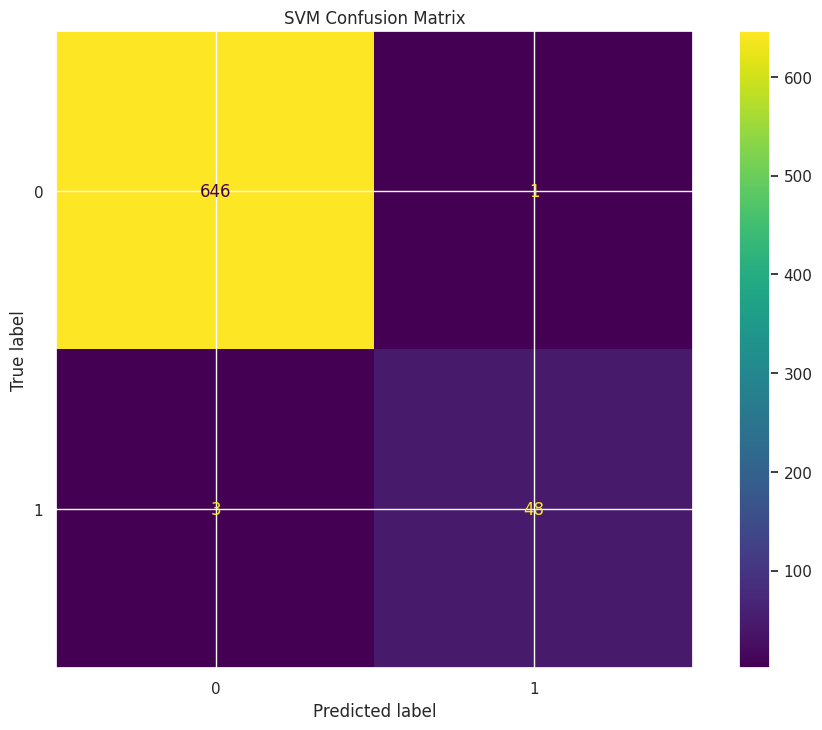

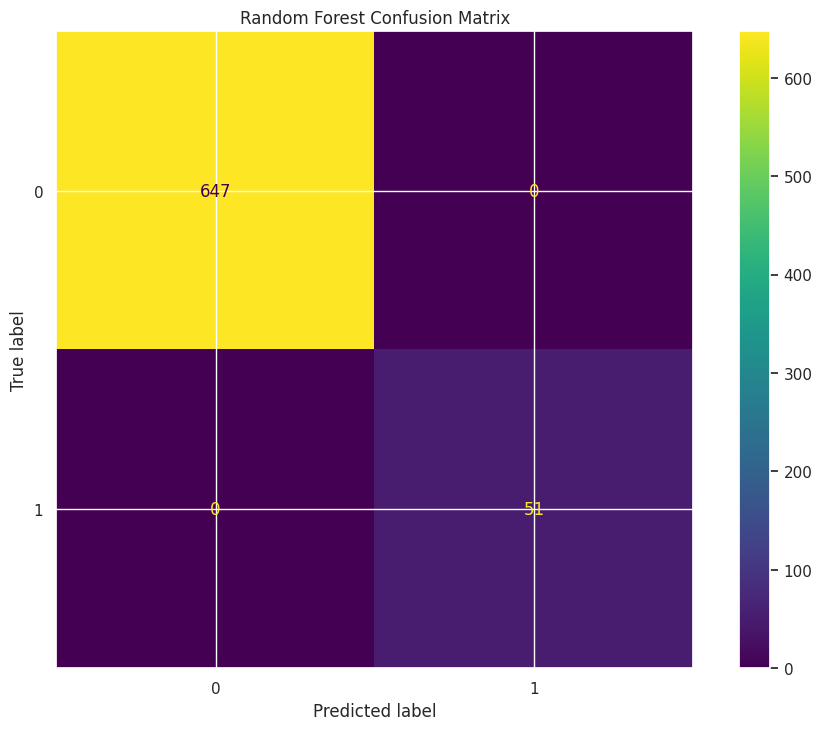

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(cm_svm).plot()
plt.title("SVM Confusion Matrix")
plt.show()

ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

#Visualize and Compare Models Using Bar Plots

In [40]:
# Define metrics and corresponding values for each model
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
svm_values = [accuracy, precision, recall, f1]  # SVM computed values
rf_values = [accuracy_rf, precision_rf, recall_rf, f1_rf]  # Random Forest computed values

In [41]:
# Bar positions
x = np.arange(len(metrics))  # Creates positions for bars
width = 0.35  # Width of bars

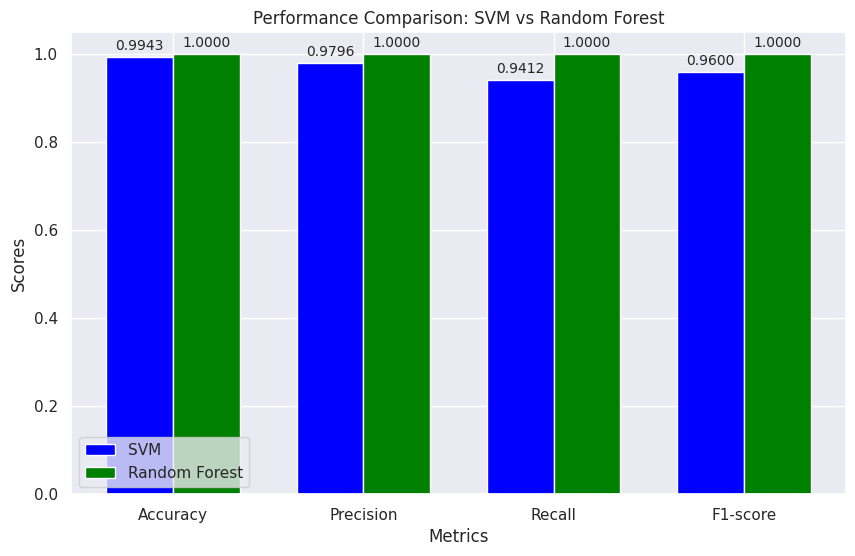

In [42]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, svm_values, width, label="SVM", color="blue")
bars2 = ax.bar(x + width/2, rf_values, width, label="Random Forest", color="green")

# Labels and Titles
ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("Performance Comparison: SVM vs Random Forest")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display score values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',  # Display values with 4 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Offset text slightly above bar
                    textcoords="offset points",
                    ha='center', fontsize=10)

# Show the plot
plt.show()